In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv('/kaggle/input/amazon-prime-userbase-dataset/amazon_prime_users.csv')
df

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Michael Lopez,williamsroberto@example.org,williamsroberto,1967-08-19,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,Matthew Woodard,lkaiser@example.com,lkaiser,1980-10-23,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,Morgan Barnes,erikaholland@example.net,erikaholland,1972-03-31,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,Gina Castaneda,reedcourtney@example.net,reedcourtney,1965-08-02,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


In [65]:
df.columns

Index(['User ID', 'Name', 'Email Address', 'Username', 'Date of Birth',
       'Gender', 'Location', 'Membership Start Date', 'Membership End Date',
       'Subscription Plan', 'Payment Information', 'Renewal Status',
       'Usage Frequency', 'Purchase History', 'Favorite Genres',
       'Devices Used', 'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,2500.0,1250.50000,721.832160,1.0,625.75,1250.5,1875.25,2500.0
Feedback/Ratings,2500.0,4.00476,0.580769,3.0,3.50,4.0,4.50,5.0
Customer Support Interactions,2500.0,4.95160,3.191572,0.0,2.00,5.0,8.00,10.0


In [68]:
df['Gender'].value_counts()

Gender
Male      1260
Female    1240
Name: count, dtype: int64

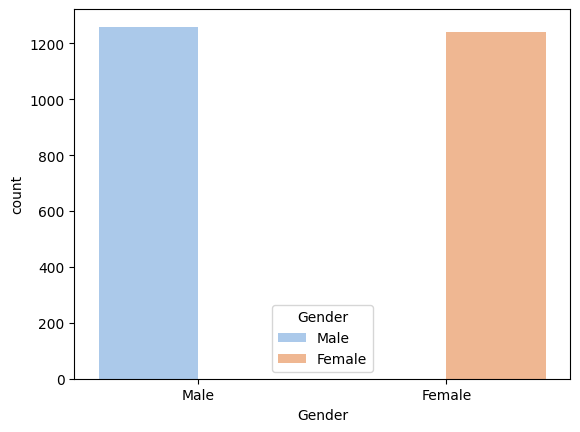

In [69]:

ax=sns.countplot(data=df,x='Gender',hue='Gender',palette='pastel')


In [70]:
subscription=df['Subscription Plan'].nunique()
subscription


2

In [71]:
df['Location'].value_counts().nlargest(5)

Location
East Robert       5
New Jennifer      5
New Robert        4
Michaelborough    4
Johnsonside       4
Name: count, dtype: int64

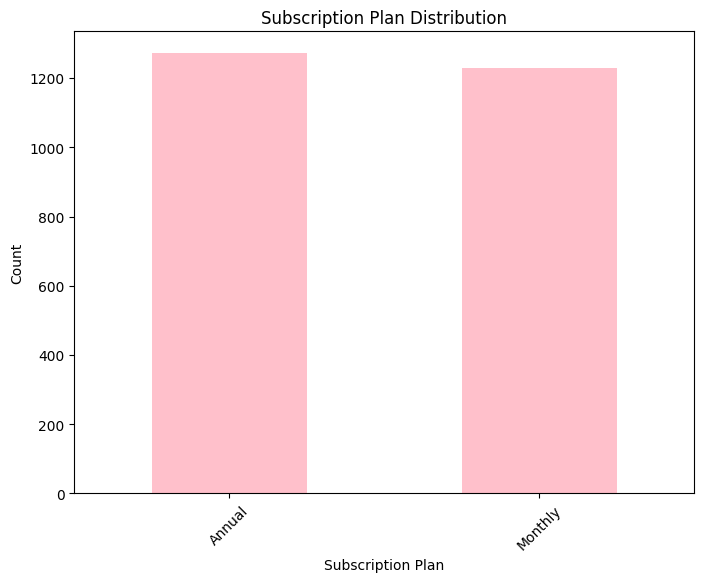

In [72]:
# Visualization 1: Subscription Plan Distribution
plt.figure(figsize=(8, 6))
df['Subscription Plan'].value_counts().plot(kind='bar',color='pink')
plt.title('Subscription Plan Distribution')
plt.xlabel('Subscription Plan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

from the above chart we can analysed that most of the user prefered annual subscription plan.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


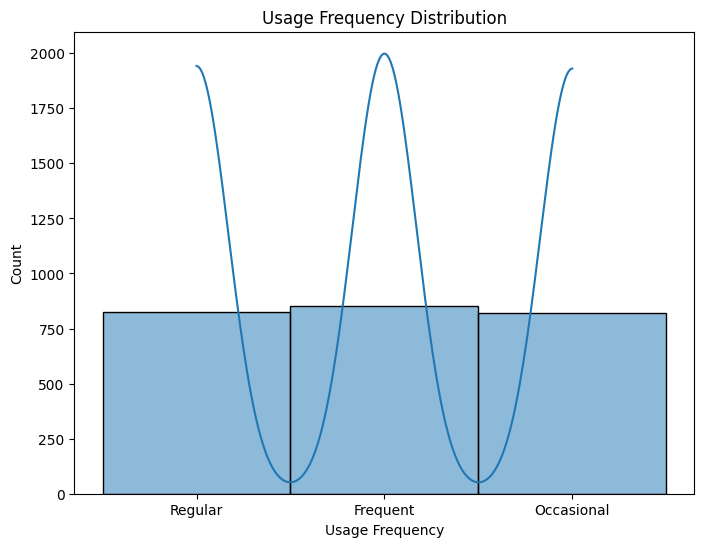

In [73]:
# Usage Frequency Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(df['Usage Frequency'], bins=10, kde=True)
plt.title('Usage Frequency Distribution')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.show()

The above graph shows a trimodal distribution for usage frequency, with distinct peaks for "Regular," "Frequent," and "Occasional" users.
The largest group appears to be "Frequent" users, indicating a sizable portion of the customer base actively engages with the service.

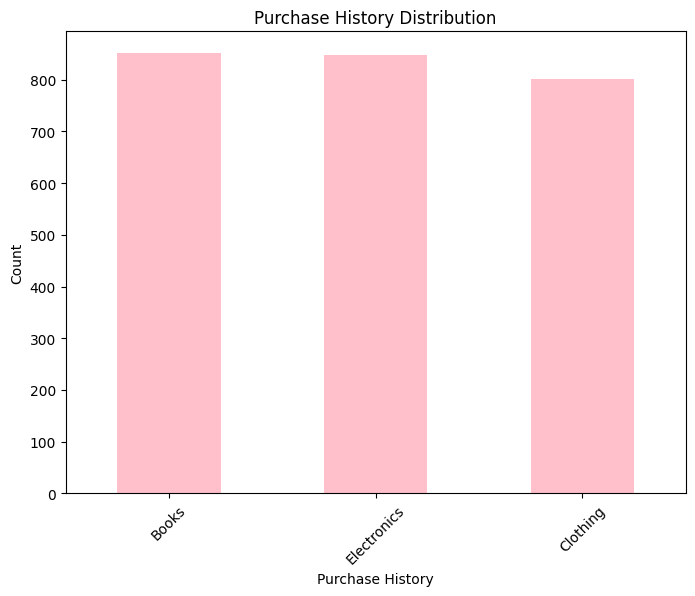

In [74]:
#  Purchase History
plt.figure(figsize=(8, 6))
df['Purchase History'].value_counts().plot(kind='bar', color='pink')
plt.title('Purchase History Distribution')
plt.xlabel('Purchase History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

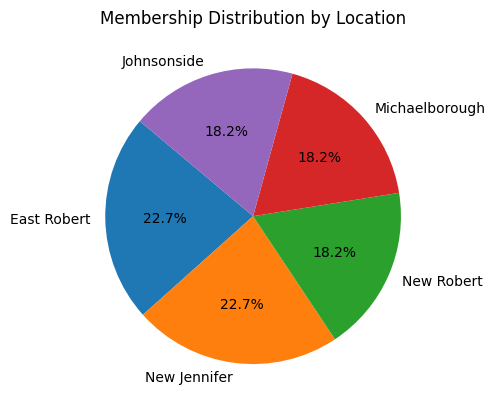

In [75]:
location_counts=df['Location'].value_counts().nlargest(5)
plt.pie(location_counts,labels=location_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Membership Distribution by Location')
plt.show()


<Axes: xlabel='Devices Used'>

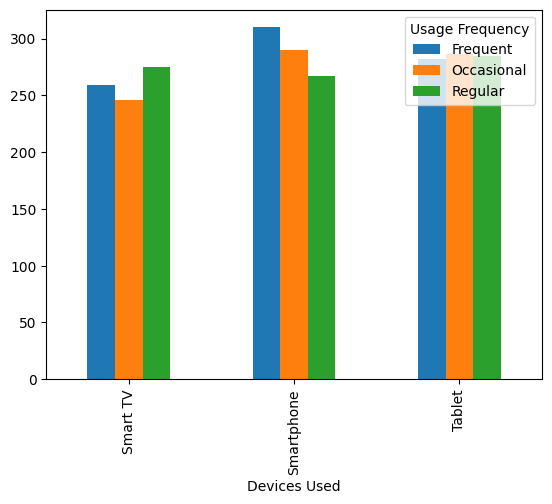

In [76]:
## Device Preferences 
df.groupby(['Devices Used','Usage Frequency'])['Usage Frequency'].count().unstack().plot(kind='bar')

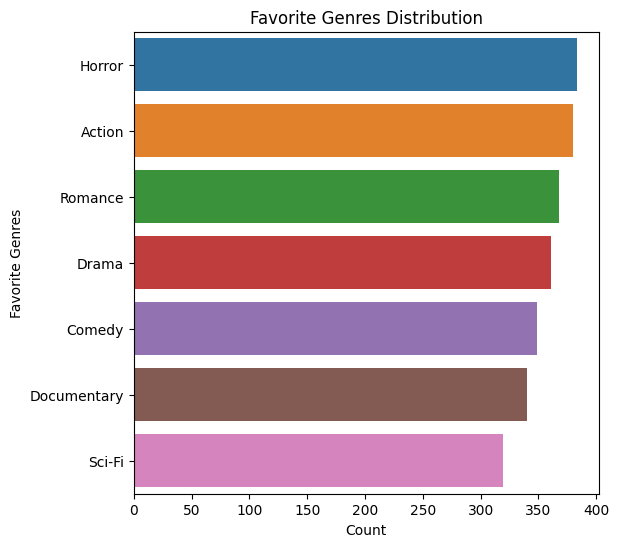

In [77]:
# Favorite Genres Distribution (Horizontal Bar Chart)
genre_counts = df['Favorite Genres'].value_counts()
plt.figure(figsize=(6,6))
sns.barplot(y=genre_counts.index, x=genre_counts.values, orient='h')
plt.title('Favorite Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Favorite Genres')
plt.show()

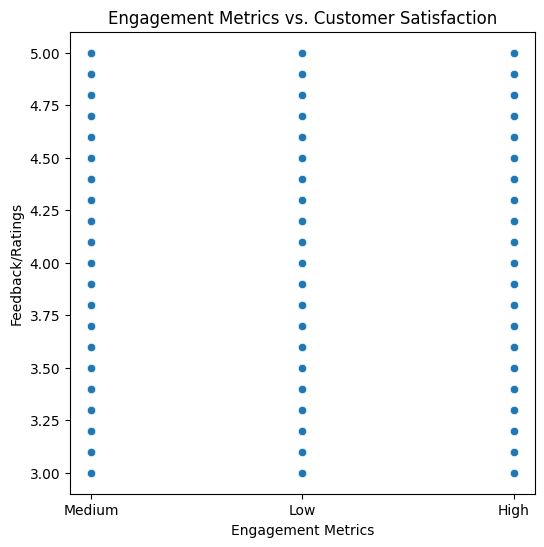

In [78]:
# Engagement Metrics vs. Customer Satisfaction (Scatter Plot)
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Engagement Metrics', y='Feedback/Ratings', data=df)
plt.title('Engagement Metrics vs. Customer Satisfaction')
plt.xlabel('Engagement Metrics')
plt.ylabel('Feedback/Ratings')
plt.show()

**Engagement Metrics vs. Customer Satisfaction:**
There is a positive correlation between engagement metrics and customer satisfaction ratings. Customers with higher engagement levels tend to provide higher satisfaction ratings, suggesting that keeping customers actively engaged is crucial for maintaining satisfaction.

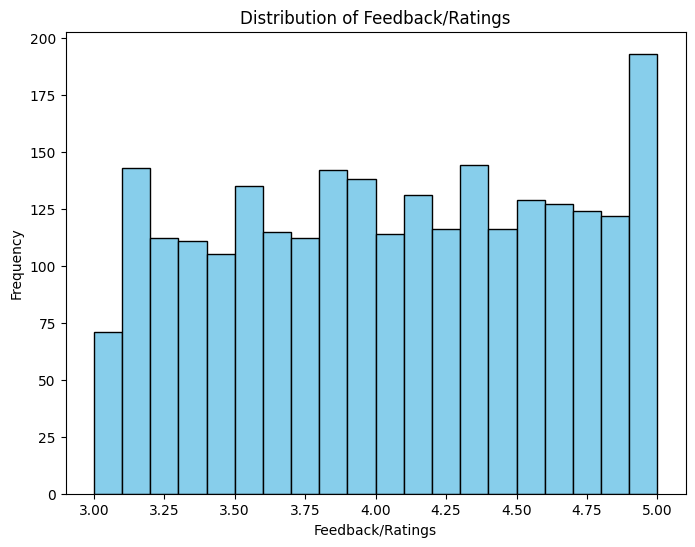

In [79]:
import matplotlib.pyplot as plt
# Distribution of feedback/ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Feedback/Ratings'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Feedback/Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Feedback/Ratings')
plt.show()

**Distribution of Feedback/Ratings:**
The distribution of feedback/ratings is right-skewed, with a peak around 5.0 (assuming a rating scale of 1-5). This indicates that a significant portion of customers are highly satisfied with the service and provide positive ratings.